In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_excel('BARCA_FINAL_HISTORY_1980_2026.xlsx')
df.head()

,player_name,season,nationality,position,age,matches_played,matches_started,matches_completed,matches_as_substitute,total_cards,minutes_played,yellow_cards,red_cards,goals,goal_contributions,manager_name,transfer_value
0,Artola,1979-80,Spain,Goalkeeper,31,28,28,28,0,1,2520,1,0,0,0,Helenio Herrera,0
1,Amigó,1979-80,Spain,Goalkeeper,25,5,5,5,0,0,450,0,0,0,0,Helenio Herrera,72k
2,Huguet,1979-80,Spain,Goalkeeper,20,1,1,1,0,0,90,0,0,0,0,Helenio Herrera,0
3,Llangostera,1979-80,Spain,Goalkeeper,24,0,0,0,0,0,0,0,0,0,0,Helenio Herrera,0
4,Ramos,1979-80,Spain,Right Back,28,9,9,7,0,4,752,3,1,0,0,Helenio Herrera,0


In [4]:
print(sorted(df['position'].unique()))

['Center Back', 'Center Forward', 'Defender', 'Forward', 'Goalkeeper', 'Left Back', 'Midfielder', 'Right Back']


In [3]:

position_map = {
    'Center Back': 'CB',
    'Defender': 'CB',       
    'Right Back': 'RB',
    'Left Back': 'LB',
    'Midfielder': 'MF',
    'Center Forward': 'CF',
    'Forward': 'FW',
    'Goalkeeper': 'GK'
}

df['position'] = df['position'].replace(position_map)

print(df['position'].unique())

['GK' 'RB' 'LB' 'CB' 'MF' 'FW' 'CF']


In [4]:
df2=df.copy()
start_excel = 603
end_excel = 628

df2 = df2.drop(df.index[(start_excel - 2) : (end_excel - 1)])

df2 = df2.reset_index(drop=True)
df2.to_excel('BARCA_DATA_CLEANED.xlsx', index=False)

In [8]:
df4=pd.read_excel('BARCA_READY_FOR_GRAPHS.xlsx')


=================================================================================================================
=================================================================================================================


1-Who is the most expensive signing in the club's history?

In [9]:

df_sorted = df4.sort_values(by=['season', 'transfer_value_numeric'], ascending=[True, False])

top_signings = df_sorted.drop_duplicates(subset='season', keep='first').copy()

def update_free_seasons(row):
    if row['transfer_value_numeric'] == 0 or pd.isna(row['transfer_value_numeric']):
        row['player_name'] = "Free Transfer"
        row['transfer_value'] = "Free Transfer"
    return row

top_signings = top_signings.apply(update_free_seasons, axis=1)

result = top_signings[['season', 'player_name', 'transfer_value_numeric']].reset_index(drop=True)
output_name = 'BARCA_SEASONAL_SUMMARY_FINAL.xlsx'
result.to_excel(output_name, index=False)

print(result)

     season     player_name  transfer_value_numeric
0   1979-80        Simonsen                  660000
1   1980-81        Schuster                 1140000
2   1981-82    Víctor Muñoz                  510000
3   1982-83        Maradona                 7300000
4   1983-84         Gabrich                  120000
5   1984-85       Archibald                 2000000
6   1985-86        Amarilla                  300000
7   1986-87         Lineker                 3200000
8   1987-88   Free Transfer                       0
9   1988-89           Soler                 1500000
10  1989-90          Koeman                 5600000
11  1990-91       Stoichkov                 2100000
12  1991-92        Witschge                 3630000
13  1992-93    Pablo Alfaro                 1500000
14  1993-94         Romário                 8000000
15  1994-95            Hagi                 4000000
16  1995-96           Kodro                 5500000
17  1996-97         Ronaldo                15000000
18  1997-98 

--- أكثر 10 جنسيات لعبت لبرشلونة تاريخياً ---
nationality
Spain          979
Brazil          99
Netherlands     73
France          53
Argentina       52
Portugal        26
Germany         24
Denmark         16
Uruguay         14
Mexico          14
Name: count, dtype: int64


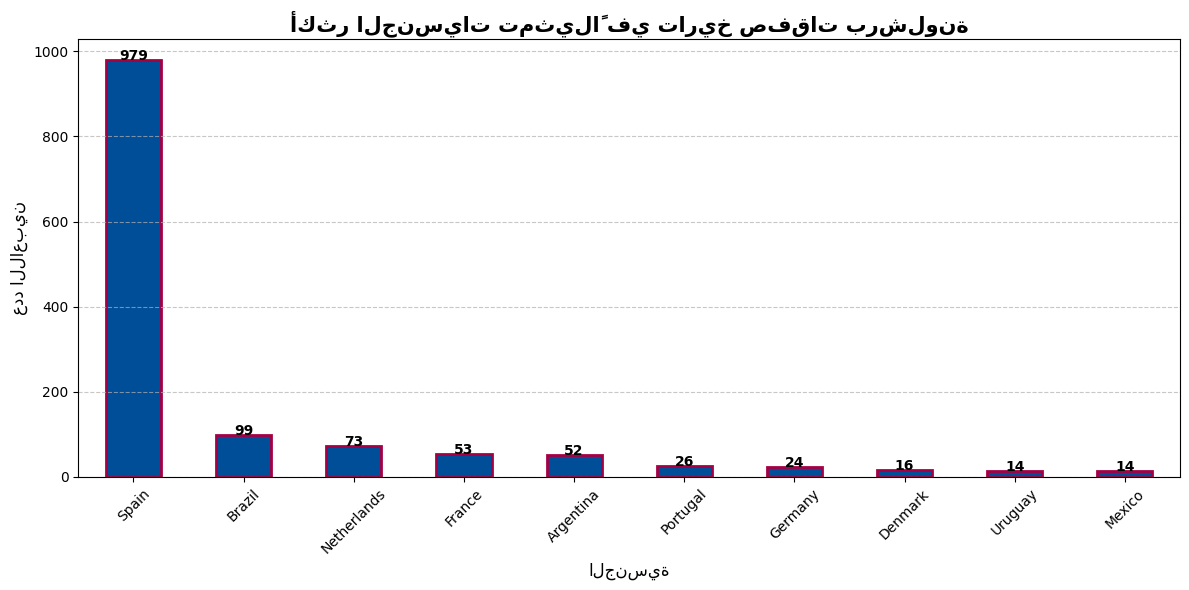

In [5]:
nationality_counts = df4['nationality'].value_counts()

# 2. اختيار أول 10 دول (الأكثر تمثيلاً)
top_nationalities = nationality_counts.head(10)

# 3. عرض النتيجة كجدول
print("--- أكثر 10 جنسيات لعبت لبرشلونة تاريخياً ---")
print(top_nationalities)

# 4. رسم بياني (Bar Chart) احترافي
plt.figure(figsize=(12, 6))
top_nationalities.plot(kind='bar', color='#004D98', edgecolor='#A50044', linewidth=2)

plt.title('أكثر الجنسيات تمثيلاً في تاريخ صفقات برشلونة', fontsize=15, fontweight='bold')
plt.xlabel('الجنسية', fontsize=12)
plt.ylabel('عدد اللاعبين', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# إضافة الأرقام فوق الأعمدة
for i, v in enumerate(top_nationalities):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

Top 10 Players by Goal Contributions:
player_name
Messi           474
Luis Suárez     147
Eto'o           108
Kluivert         89
Rivaldo          86
Stoichkov        83
Lewandowski      78
Luis Enrique     73
Bakero           72
Ronaldinho       69
Name: goal_contributions, dtype: int64


<Axes: title={'center': 'Top Goal Contributors'}, ylabel='player_name'>

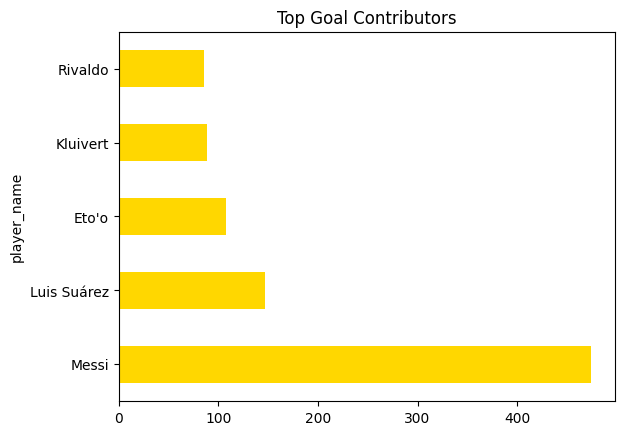

In [6]:
# 1. Most Goal Contributions (Total goals and assists across all seasons)
goal_stats = df4.groupby('player_name')['goal_contributions'].sum().sort_values(ascending=False)

print("Top 10 Players by Goal Contributions:")
print(goal_stats.head(10))

# To visualize the top 5
goal_stats.head(5).plot(kind='barh', color='gold', title='Top Goal Contributors')

In [8]:
# 2. Most Matches and Minutes Played (Durability and consistency)
appearance_stats = df4.groupby('player_name').agg({
    'matches_played': 'sum',
    'minutes_played': 'sum'
}).sort_values(by='minutes_played', ascending=False)

print("Top 10 Players by Total Minutes Played:")
print(appearance_stats.head(10))

Top 10 Players by Total Minutes Played:
               matches_played  minutes_played
player_name                                  
Busquets                  560           44494
Messi                     520           42150
Xavi                      505           39166
Víctor Valdés             387           34691
Piqué                     397           33516
Puyol                     392           32940
Iniesta                   442           29634
Zubizarreta               301           26945
Ter Stegen                291           25985
Jordi Alba                313           25626


In [10]:
# 3. Most Disciplined Players (Total Yellow and Red Cards)
discipline_stats = df4.groupby('player_name').agg({
    'yellow_cards': 'sum',
    'red_cards': 'sum',
    'total_cards': 'sum'
}).sort_values(by='total_cards', ascending=False)

print("Top 10 Players with Most Cards:")
print(discipline_stats.head(10))

Top 10 Players with Most Cards:
             yellow_cards  red_cards  total_cards
player_name                                      
Busquets              136          3          139
Piqué                 114          8          122
Guardiola              87          8           95
Puyol                  78          2           80
Jordi Alba             71          3           74
Ferrer                 66          6           72
Dani Alves             61          5           66
Figo                   55          5           60
Stoichkov              50          8           58
Sergi                  55          2           57


In [12]:
# 4. Longest Serving Players (Total number of seasons stayed in the club)
loyalty_stats = df4.groupby('player_name')['season'].count().sort_values(ascending=False)

print("Top 10 Longest Serving Players (By Number of Seasons):")
print(loyalty_stats.head(10))

Top 10 Longest Serving Players (By Number of Seasons):
player_name
Busquets         24
Xavi             18
Messi            17
Iniesta          16
Puyol            16
Piqué            15
Sergi            14
Sergi Roberto    14
Alexanco         13
Víctor Valdés    13
Name: season, dtype: int64


In [14]:
# 1. Longest Serving Managers (Counting unique seasons for each manager)
manager_loyalty = df4.groupby('manager_name')['season'].nunique().sort_values(ascending=False)

print("Managers with the most seasons at FC Barcelona:")
print(manager_loyalty.head(10))

Managers with the most seasons at FC Barcelona:
manager_name
Johan Cruyff        7
Frank Rijkaard      5
Pep Guardiola       4
Carles Rexach       3
Terry Venables      3
Xavi Hernández      3
Louis van Gaal      3
Luis Enrique        3
Hansi Flick         2
Ernesto Valverde    2
Name: season, dtype: int64


In [16]:
# Grouping by player to sum minutes and join season names into a list
least_impact = df4.groupby('player_name').agg({
    'minutes_played': 'sum',
    'matches_played': 'sum',
    'season': lambda x: ', '.join(x.unique()) # This joins all seasons for the player
}).sort_values(by='minutes_played', ascending=True)

# Displaying players who played very little (more than 0 minutes but very low total)
print("Least Impact Players (Lowest Minutes) and their Seasons:")
print(least_impact[least_impact['minutes_played'] > 0].head(15))

Least Impact Players (Lowest Minutes) and their Seasons:
                minutes_played  matches_played  \
player_name                                      
Riad                         1               1   
Mika Mármol                  1               1   
Arnaiz                       5               1   
Aleix Garrido                6               1   
Dongou                       6               1   
Ros                          7               1   
Juanjo                       9               1   
Masó                         9               1   
Serer                       10               1   
Estanis                     10               1   
Herrera                     13               1   
Víctor Vázquez              13               1   
Nolito                      14               2   
Abraham                     14               1   
Durán                       15               1   

                                            season  
player_name                            

In [19]:
# Calculate the average age of players signed in each season
average_age_per_season = df4.groupby('season')['age'].mean().reset_index()

# Rename columns for clarity
average_age_per_season.columns = ['Season', 'Average_Age']

print("Average Age of Signings per Season:")
print(average_age_per_season)

# To see the overall average age of all signings in the history:
overall_avg_age = df4['age'].mean()
print(f"\nOverall Average Age of all Barcelona Signings: {overall_avg_age:.2f} years")

Average Age of Signings per Season:
     Season  Average_Age
0   1979-80    25.678571
1   1980-81    25.580645
2   1981-82    26.375000
3   1982-83    26.416667
4   1983-84    26.290323
5   1984-85    24.594595
6   1985-86    26.566667
7   1986-87    27.653846
8   1987-88    26.857143
9   1988-89    25.571429
10  1989-90    24.607143
11  1990-91    25.310345
12  1991-92    25.888889
13  1992-93    25.925926
14  1993-94    26.333333
15  1994-95    25.068966
16  1995-96    23.937500
17  1996-97    25.678571
18  1997-98    24.647059
19  1998-99    25.125000
20  1999-00    25.153846
21  2000-01    24.531250
22  2001-02    25.781250
23  2002-03    25.343750
24  2003-04    24.000000
25  2004-05    24.085714
26  2005-06    24.500000
27  2006-07    25.433333
28  2007-08    25.088235
29  2008-09    23.970588
30  2009-10    24.533333
31  2010-11    24.000000
32  2011-12    24.117647
33  2012-13    24.875000
34  2013-14    25.379310
35  2014-15    24.645161
36  2015-16    25.062500
37  2016-17   

In [20]:
# 1. Sort by season (ascending) and age (ascending)
# This puts the youngest players at the top of each season group
df_youngest = df4.sort_values(by=['season', 'age'], ascending=[True, True])

# 2. Drop duplicates to keep only the first (youngest) player per season
youngest_per_season = df_youngest.drop_duplicates(subset='season', keep='first').copy()

# 3. Create the final result table
# We include age and position to make it more informative
youngest_result = youngest_per_season[['season', 'player_name', 'age', 'position']].reset_index(drop=True)

print("--- Youngest Player in Each Season (FC Barcelona) ---")
print(youngest_result)

# Save to excel for your Dashboard
youngest_result.to_excel('BARCA_YOUNGEST_PER_SEASON.xlsx', index=False)

--- Youngest Player in Each Season (FC Barcelona) ---
     season         player_name  age position
0   1979-80              Manolo   19       LB
1   1980-81              Manolo   20       LB
2   1981-82              Manolo   21       LB
3   1982-83              Manolo   22       LB
4   1983-84             Gabrich   20       FW
5   1984-85                Font   18       GK
6   1985-86               Nayim   19       MF
7   1986-87               Nayim   20       MF
8   1987-88               Linde   18       FW
9   1988-89                Amor   20       MF
10  1989-90               Sergi   18       CB
11  1990-91               Sergi   19       CB
12  1991-92           Guardiola   20       MF
13  1992-93               Sergi   20       LB
14  1993-94               Sergi   21       LB
15  1994-95           José Mari   17       MF
16  1995-96           Xavi Roca   19       RB
17  1996-97          De la Peña   20       MF
18  1997-98                Xavi   17       MF
19  1998-99               

In [28]:
# 1. Calculate Total Spending and Number of Signings
manager_stats = df4.groupby('manager_name').agg({
    'transfer_value_numeric': 'sum',
    'player_name': 'count',
    'season': ['min', 'max'] # Get the first and last season
}).reset_index()

# 2. Flatten the columns after aggregation
manager_stats.columns = ['Manager Name', 'Total Spending (M€)', 'Number of Signings', 'First Season', 'Last Season']

# 3. Calculate Tenure (Years stayed)
# This function extracts the first year from the season string (e.g., '2014-15' -> 2014)
def calculate_years(row):
    try:
        start_year = int(str(row['First Season']).split('-')[0])
        end_year = int(str(row['Last Season']).split('-')[0])
        # We add 1 to include the current season (e.g., 2014 to 2015 is 2 seasons)
        return (end_year - start_year) + 1
    except:
        return 1

manager_stats['Years Stayed'] = manager_stats.apply(calculate_years, axis=1)

# 4. Sort by Total Spending
manager_summary = manager_stats.sort_values(by='Total Spending (M€)', ascending=False).reset_index(drop=True)

print("--- Manager Spending Analysis with Tenure ---")
print(manager_summary[['Manager Name', 'Total Spending (M€)', 'Number of Signings', 'Years Stayed']].head(10))



--- Manager Spending Analysis with Tenure ---
       Manager Name  Total Spending (M€)  Number of Signings  Years Stayed
0  Ernesto Valverde               517.20                  70             2
1      Luis Enrique               347.47                  96             3
2     Pep Guardiola               320.00                 133             4
3     Quique Setién               270.00                  42             1
4    Xavi Hernández               267.40                 126             3
5    Frank Rijkaard               221.85                 169             5
6     Carles Rexach               193.20                  96             7
7     Ronald Koeman               141.94                  32             1
8    Louis van Gaal               141.85                  92             3
9       Hansi Flick                88.00                  74             2


In [30]:
import pandas as pd

# 1. Filter only for players with a price (Paid Signings)
paid_df = df4[df4['transfer_value_numeric'] > 0].copy()

# 2. Group by manager to calculate spending, count, and tenure
manager_stats = paid_df.groupby('manager_name').agg({
    'transfer_value_numeric': 'sum',    # Total Spending
    'player_name': 'nunique',            # Number of unique paid signings
    'season': ['min', 'max']             # To calculate years stayed
}).reset_index()

# 3. Clean up column names
manager_stats.columns = ['Manager Name', 'Total Spending (M€)', 'Number of Signings', 'First Season', 'Last Season']

# 4. Calculate Years Stayed
def get_tenure(row):
    try:
        start = int(str(row['First Season']).split('-')[0])
        end = int(str(row['Last Season']).split('-')[0])
        return (end - start) + 1
    except:
        return 1

manager_stats['Years Stayed'] = manager_stats.apply(get_tenure, axis=1)

# 5. Select only the requested columns and sort by spending
final_manager_report = manager_stats[['Manager Name', 'Total Spending (M€)', 'Number of Signings', 'Years Stayed']]
final_manager_report = final_manager_report.sort_values(by='Total Spending (M€)', ascending=False).reset_index(drop=True)

# Print results
print("--- Final Manager Spending Analysis ---")
print(final_manager_report.head(10))

# Save for your dashboard
final_manager_report.to_excel('BARCA_MANAGER_DASHBOARD_FINAL.xlsx', index=False)

--- Final Manager Spending Analysis ---
       Manager Name  Total Spending (M€)  Number of Signings  Years Stayed
0  Ernesto Valverde               517.20                  14             2
1      Luis Enrique               347.47                  16             3
2     Pep Guardiola               320.00                  14             4
3     Quique Setién               270.00                   5             1
4    Xavi Hernández               267.40                  10             3
5    Frank Rijkaard               221.85                  18             5
6     Carles Rexach               193.20                  15             7
7     Ronald Koeman               141.94                   5             1
8    Louis van Gaal               141.85                  15             3
9      Tata Martino                88.00                   1             1
